## **Drop all non-numeric columns / Keep selected type of columns**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('http://bit.ly/imdbratings', nrows=20)
print(df.dtypes)

df1 = df.select_dtypes(exclude=['object']) # There is include attribute as well
print('\nExcluded object type columns:')
print(df1.dtypes)

#inlcude attribute ==> 1
df2_1 = df.select_dtypes(include=['float64','int64']) # There is include attribute as well
print('\n==> 1')
print('Included only numeric type columns:')
print(df2_1.dtypes)

#inlcude attribute ==> 2
df2_2 = df.select_dtypes(include=[np.number]) # There is include attribute as well
print('\n==> 2')
print('Included only numeric type columns:')
print(df2_2.dtypes)

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

Excluded object type columns:
star_rating    float64
duration         int64
dtype: object

==> 1
Included only numeric type columns:
star_rating    float64
duration         int64
dtype: object

==> 2
Included only numeric type columns:
star_rating    float64
duration         int64
dtype: object


### **String Operation using REGULAR EXPRESSIONS**

In [23]:
print(df.actors_list.head(),'\n')

print(df.actors_list.str.replace('[\[\]u\']','').head())

0    [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
1      [u'Marlon Brando', u'Al Pacino', u'James Caan']
2    [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
3    [u'Christian Bale', u'Heath Ledger', u'Aaron E...
4    [u'John Travolta', u'Uma Thurman', u'Samuel L....
Name: actors_list, dtype: object 

0         Tim Robbins, Morgan Freeman, Bob Gnton
1           Marlon Brando, Al Pacino, James Caan
2        Al Pacino, Robert De Niro, Robert Dvall
3    Christian Bale, Heath Ledger, Aaron Eckhart
4    John Travolta, Uma Thrman, Samel L. Jackson
Name: actors_list, dtype: object


#### **loading dtypes on loading itself**

In [24]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [38]:
# 1
drinks.beer_servings = drinks.beer_servings.astype(float)
drinks.beer_servings.dtype

dtype('float64')

In [37]:
# 2
drinks_onload = pd.read_csv('http://bit.ly/drinksbycountry', dtype={'beer_servings': float})
drinks_onload.beer_servings.dtype

dtype('float64')

# **.**

In [2]:
chip_orders = pd.read_csv('http://bit.ly/chiporders', sep='\t')
display(chip_orders.head())
print('\n',chip_orders.dtypes,'\n')

chip_orders.item_price = chip_orders.item_price.str.replace('$','').astype(float)
print(chip_orders.item_price.head(),'\n')
print(chip_orders.dtypes)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98



 order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object 

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64 

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object


In [5]:
print(chip_orders.item_name.str.contains('Chicken').astype(int).head())
chip_orders.item_name.str.contains('Chicken').astype(int).mean()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int32


0.33751622674167026

### **Groupby**

In [3]:
chip_orders.choice_description = chip_orders.choice_description.str.replace('[\[\]]','')
chip_orders.groupby('choice_description').quantity.agg(['mean','min','max','count'])

,mean,min,max,count
choice_description,,,,
Adobo-Marinated and Grilled Chicken,1.0,1,1,1
"Adobo-Marinated and Grilled Chicken, Pinto Beans, Sour Cream, Salsa, Cheese, Cilantro-Lime Rice, Guacamole",1.0,1,1,1
"Adobo-Marinated and Grilled Chicken, Sour Cream, Cheese, Cilantro-Lime Rice",1.0,1,1,1
Adobo-Marinated and Grilled Steak,1.0,1,1,1
"Adobo-Marinated and Grilled Steak, Sour Cream, Salsa, Cheese, Cilantro-Lime Rice, Guacamole",1.0,1,1,1
...,...,...,...,...
"Tomatillo-Red Chili Salsa (Hot), Tomatillo-Green Chili Salsa (Medium), Rice, Pinto Beans, Fajita Veggies, Lettuce",1.0,1,1,1
White Rice,1.0,1,1,2
"White Rice, Adobo-Marinated and Grilled Chicken, Vegetarian Black Beans",1.0,1,1,1


In [4]:
chip_orders.groupby('choice_description').agg(['mean','min','max','count'])

order_id                    \
                                                       mean   min   max count   
choice_description                                                              
Adobo-Marinated and Grilled Chicken                   217.0   217   217     1   
Adobo-Marinated and Grilled Chicken, Pinto Bean...    214.0   214   214     1   
Adobo-Marinated and Grilled Chicken, Sour Cream...    279.0   279   279     1   
Adobo-Marinated and Grilled Steak                     217.0   217   217     1   
Adobo-Marinated and Grilled Steak, Sour Cream, ...    279.0   279   279     1   
...                                                     ...   ...   ...   ...   
Tomatillo-Red Chili Salsa (Hot), Tomatillo-Gree...   1299.0  1299  1299     1   
White Rice                                           1691.0  1691  1691     2   
White Rice, Adobo-Marinated and Grilled Chicken...    575.0   575   575     1   
White Rice, Adobo-Marinated and Grilled Steak, ...    313.0   313   313     1   
White Rice, Adobo-Marinated and Grilled Steak, ...    313.0   313   313     1   

                                                   quantity                \
                                                       mean min max count   
choice_description                                                          
Adobo-Marinated and Grilled Chicken                     1.0   1   1     1   
Adobo-Marinated and Grilled Chicken, Pinto Bean...      1.0   1   1     1   
Adobo-Marinated and Grilled Chicken, Sour Cream...      1.0   1   1     1   
Adobo-Marinated and Grilled Steak                       1.0   1   1     1   
Adobo-Marinated and Grilled Steak, Sour Cream, ...      1.0   1   1     1   
...                                                     ...  ..  ..   ...   
Tomatillo-Red Chili Salsa (Hot), Tomatillo-Gree...      1.0   1   1     1   
White Rice                                              1.0   1   1     2   
White Rice, Adobo-Marinated and Grilled Chicken...      1.0   1   1     1   
White Rice, Adobo-Marinated and Grilled Steak, ...      1.0   1   1     1   
White Rice, Adobo-Marinated and Grilled Steak, ...      1.0   1   1     1   

                                                   item_price              \
                                                         mean   min   max   
choice_description                                                          
Adobo-Marinated and Grilled Chicken                      7.40  7.40  7.40   
Adobo-Marinated and Grilled Chicken, Pinto Bean...       7.40  7.40  7.40   
Adobo-Marinated and Grilled Chicken, Sour Cream...       7.40  7.40  7.40   
Adobo-Marinated and Grilled Steak                        7.40  7.40  7.40   
Adobo-Marinated and Grilled Steak, Sour Cream, ...       7.40  7.40  7.40   
...                                                       ...   ...   ...   
Tomatillo-Red Chili Salsa (Hot), Tomatillo-Gree...       8.99  8.99  8.99   
White Rice                                               8.50  8.50  8.50   
White Rice, Adobo-Marinated and Grilled Chicken...       7.40  7.40  7.40   
White Rice, Adobo-Marinated and Grilled Steak, ...       7.40  7.40  7.40   
White Rice, Adobo-Marinated and Grilled Steak, ...       7.40  7.40  7.40   

                                                          
                                                   count  
choice_description                                        
Adobo-Marinated and Grilled Chicken                    1  
Adobo-Marinated and Grilled Chicken, Pinto Bean...     1  
Adobo-Marinated and Grilled Chicken, Sour Cream...     1  
Adobo-Marinated and Grilled Steak                      1  
Adobo-Marinated and Grilled Steak, Sour Cream, ...     1  
...                                                  ...  
Tomatillo-Red Chili Salsa (Hot), Tomatillo-Gree...     1  
White Rice                                             2  
White Rice, Adobo-Marinated and Grilled Chicken...     1  
White Rice, Adobo-Marinated and Grilled Steak, ...

In [5]:
%matplotlib inline

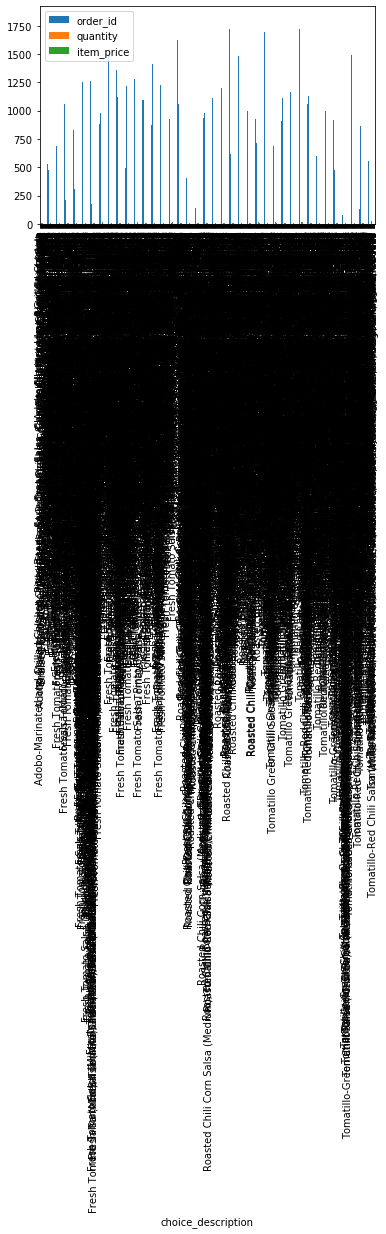

In [6]:
chip_orders.groupby('choice_description').mean().plot(kind='bar')

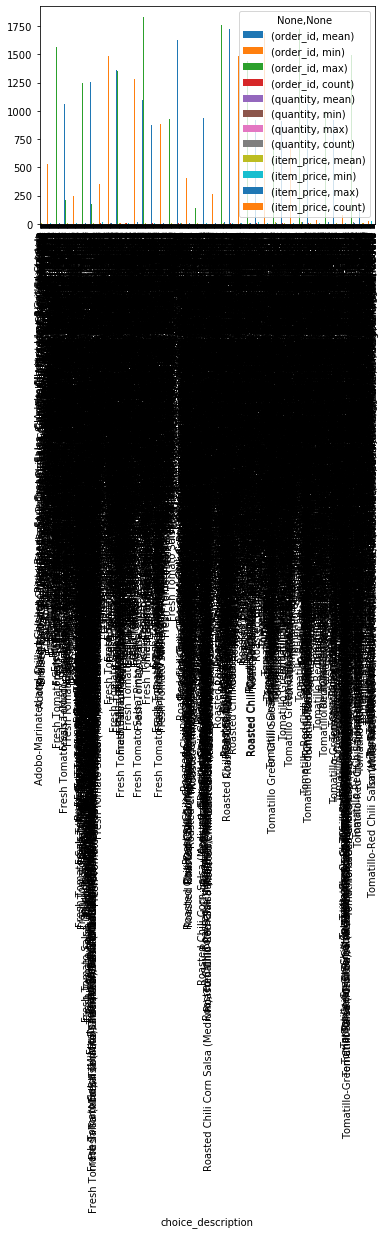

In [7]:
chip_orders.groupby('choice_description').agg(['mean','min','max','count']).plot(kind='bar')

## **SEE YOU AGAIN**